# Use Case for Hackathon

### We get a dataset, we have to understand it and get value from it

A school wants to hire us to see whether we are able to understand some problems they believe they are facing. 

Something is going wrong with the performance of the students but they are not able to figure it out and give reasons to it. 

Some parents are very disappointed of the grades of their kids and have complaint continiously to the board of the school. 

Our company is low on budget and we accept the deal even if it is risky, stressful and the money won't cover much of our runaway either but we take what we get. 

## Let's get to it and try to help the School!

### Import dataset and do the first general analysis

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
url='https://drive.google.com/file/d/1ETCwd-hUZ_qhQX0M0OY6OAddVE4bCSOW/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [80]:
df.describe()

,math score,reading score,writing score,id_student,address,Year,Age
count,1010.000000,1010.000000,1010.000000,1010.000000,0.0,1010.000000,943.000000
mean,66.420792,64.930693,70.289109,1494.599010,NaN,2021.104950,15.483563
std,15.481187,18.990769,19.125831,291.537945,NaN,7.681396,1.151707
min,13.000000,15.000000,23.000000,1000.000000,NaN,1990.000000,14.000000
25%,56.000000,54.000000,58.000000,1242.250000,NaN,2023.000000,14.000000
50%,66.000000,68.000000,68.000000,1494.500000,NaN,2023.000000,16.000000
75%,77.000000,78.000000,79.000000,1746.750000,NaN,2023.000000,17.000000
max,120.000000,100.000000,100.000000,1999.000000,NaN,2023.000000,17.000000


In [81]:
# Based oon the analysis: address column is not useful, there are records of year 1990 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


In [83]:
df.shape

(1010, 12)

In [84]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'address', 'Year', 'Age'],
      dtype='object')

In [85]:
df.isna().sum()

gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
id_student                        0
address                        1010
Year                              0
Age                              67
dtype: int64

1. Why is student id int? If it is a string. It is not a number

2. We need to inspect all the object columns and check the value counts. What do we discover when we do it? 

3. The distribution of the year column is a bit odd. We need to look more into it. 

4. Do we have duplicates in the dataset?

5. All rows of the column address are missing, maybe we can just delete it

6. The age column has 77 missing values. What should we do with it? 

7. There seems to be values for the math scores higher than 120. Are those outliers? 

### 1. Change type of student id  

In [86]:
df['id_student']=df['id_student'].astype(str)

In [87]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
id_student                      object
address                        float64
Year                             int64
Age                            float64
dtype: object

### 2. Explore the columns that are objects (string)

In [88]:
for col in df.columns:
    if col != 'id_studdent' and df[col].dtype=='object':
        print(df[col].value_counts())

gender
male      373
female    337
FEMALE    103
MALE       97
Male       54
Female     46
Name: count, dtype: int64
race/ethnicity
group C    324
group D    265
group B    206
group E    134
group A     81
Name: count, dtype: int64
parental level of education
some college          225
high school           206
associate's degree    204
some high school      192
bachelor's degree     113
master's degree        70
Name: count, dtype: int64
lunch
standard        659
free/reduced    351
Name: count, dtype: int64
test preparation course
none         672
completed    338
Name: count, dtype: int64
id_student
1000    2
1006    2
1009    2
1008    2
1007    2
       ..
1343    1
1344    1
1345    1
1346    1
1999    1
Name: count, Length: 1000, dtype: int64


### 3. Seems that the column gender has a lot of versions we are going to have to fix this

In [89]:
df['gender']=df['gender'].str.upper()

In [90]:
df['gender'].value_counts()

gender
MALE      524
FEMALE    486
Name: count, dtype: int64

In [91]:
df['Year'].unique()

array([2023, 1990], dtype=int64)

### 4. What may be happening with the year? 

In [92]:
df = df[df['Year'] != 1990]

### 5. Do we have any duplicates? 

In [93]:
df.shape

(952, 12)

In [94]:
df=df.drop_duplicates()

In [95]:
df.shape

(942, 12)

### 6.1. Missing values: Remember the column address

In [96]:
df=df.drop('address',axis=1)    

### 6.2. What about the missing values of the column Age? 

In [97]:
# Calculate the mean of the Age column (ignoring NaN values)
age_mean = df['Age'].mean()

# Print the current count of missing values and the calculated mean
print(f"Number of missing Age values: {df['Age'].isna().sum()}")
print(f"Mean Age: {age_mean:.2f}")


Number of missing Age values: 62
Mean Age: 15.50


In [98]:
# Replace missing values in the Age column with the mean
df['Age'] = df['Age'].fillna(age_mean)

# Verify that there are no more missing values in the Age column
print(f"Number of missing Age values after imputation: {df['Age'].isna().sum()}")

Number of missing Age values after imputation: 0


### 7. What is going on with the math scores?

In [99]:
df_original = df.copy()

In [100]:
# Display the potential outliers
outliers = df[(df['math score'] > 100) | (df['math score'] < 20)]
print("\nPotential outliers:")
print(outliers[['math score', 'gender', 'race/ethnicity', 'parental level of education']])


Potential outliers:
     math score  gender race/ethnicity parental level of education
11          120  FEMALE        group D                 high school
392          13  FEMALE        group C                some college
832          13  FEMALE        group D                some college


In [101]:
# Function to clean math scores
def clean_math_score(score):
    # Cap maximum score at 100 (assuming it's a percentage or standardized test)
    if score > 100:
        return 100
    
    # Very low scores need investigation, but for now keep values ≥ 20
    # For values below 20, we could replace with NaN to mark them as suspicious
    # or set a minimum threshold (e.g., 20)
    elif score < 20:
        return np.nan  # Mark as missing to handle separately
    
    return score

# Apply the cleaning function
df['math score cleaned'] = df['math score'].apply(clean_math_score)


## Do some initial plots? EDA

### What do you find interesting?  

- To me the reading score is really intriguing --> We need to really work on understanding what is going on
- The writing score is also characteristic but in principle I am not that worried about it. 

#### We know for a fact that the id_student and the year will not be relevant for any analysis as they are the same value for the whole dataset

Maybe we can delete them from now on

C:\Users\emc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

<Figure size 1200x1000 with 0 Axes>

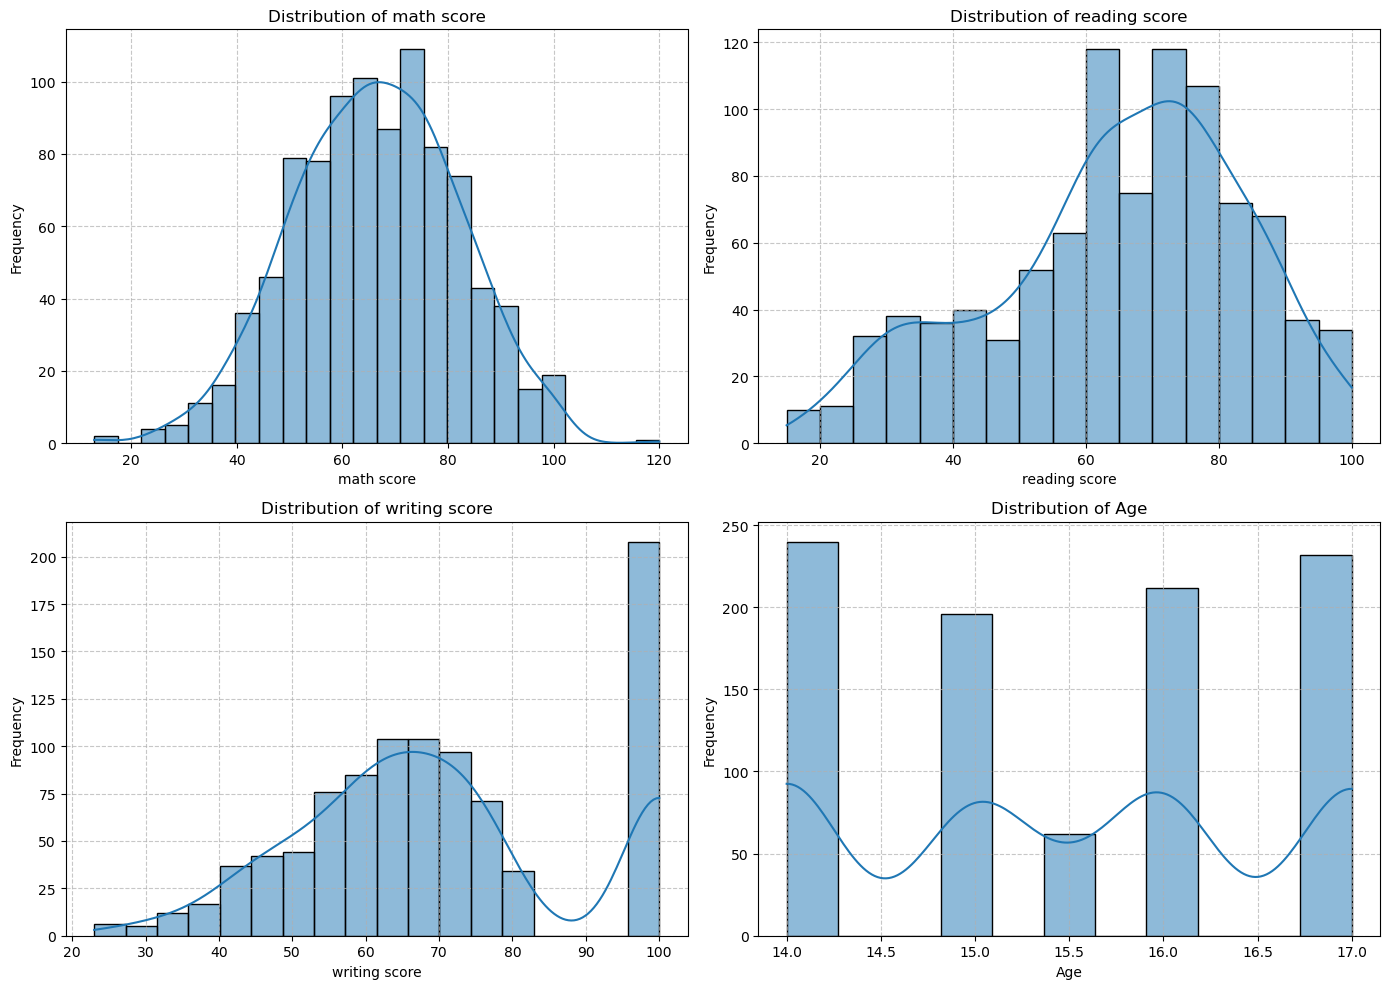

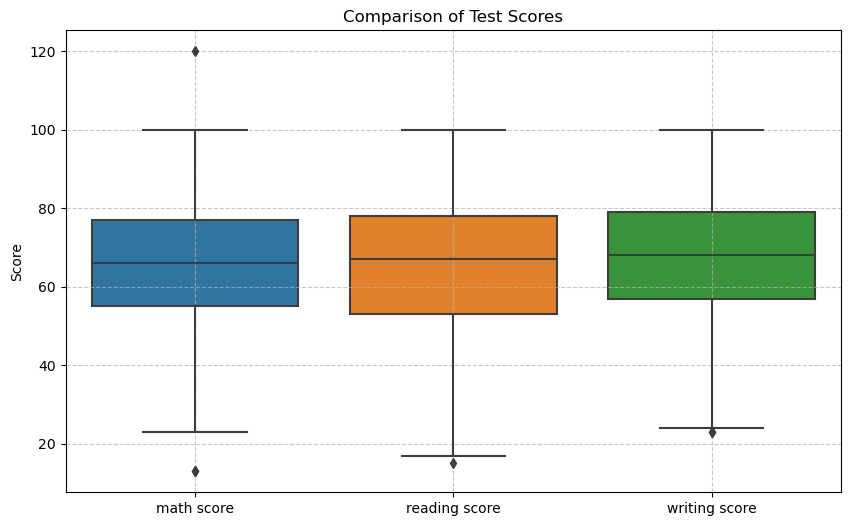

Basic analysis plots created!


In [102]:
# Set basic style
plt.style.use('default')
plt.figure(figsize=(12, 10))

# Create histograms for numeric variables
numeric_cols = ['math score', 'reading score', 'writing score', 'Age']

# Create a 2x2 grid of histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('score_distributions.png')
plt.show()

# Create boxplots for comparison of scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Comparison of Test Scores')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('score_boxplots.png')
plt.show()

print("Basic analysis plots created!")

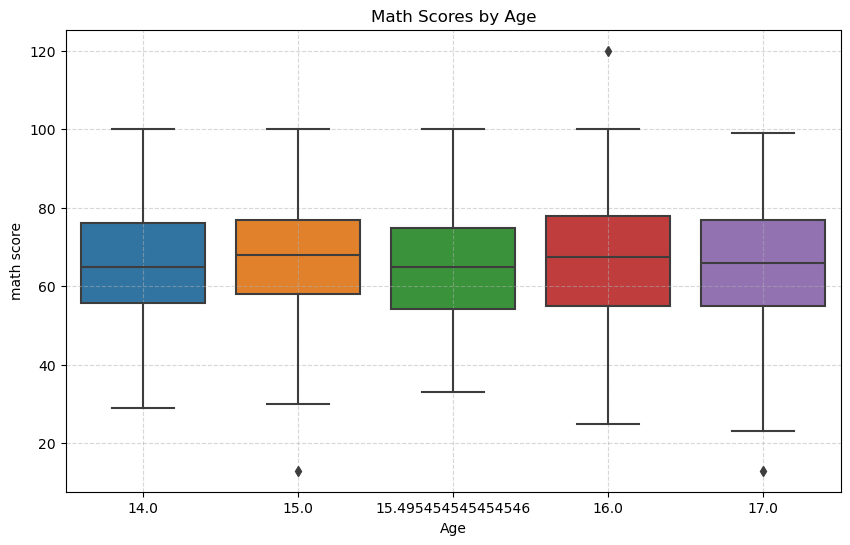

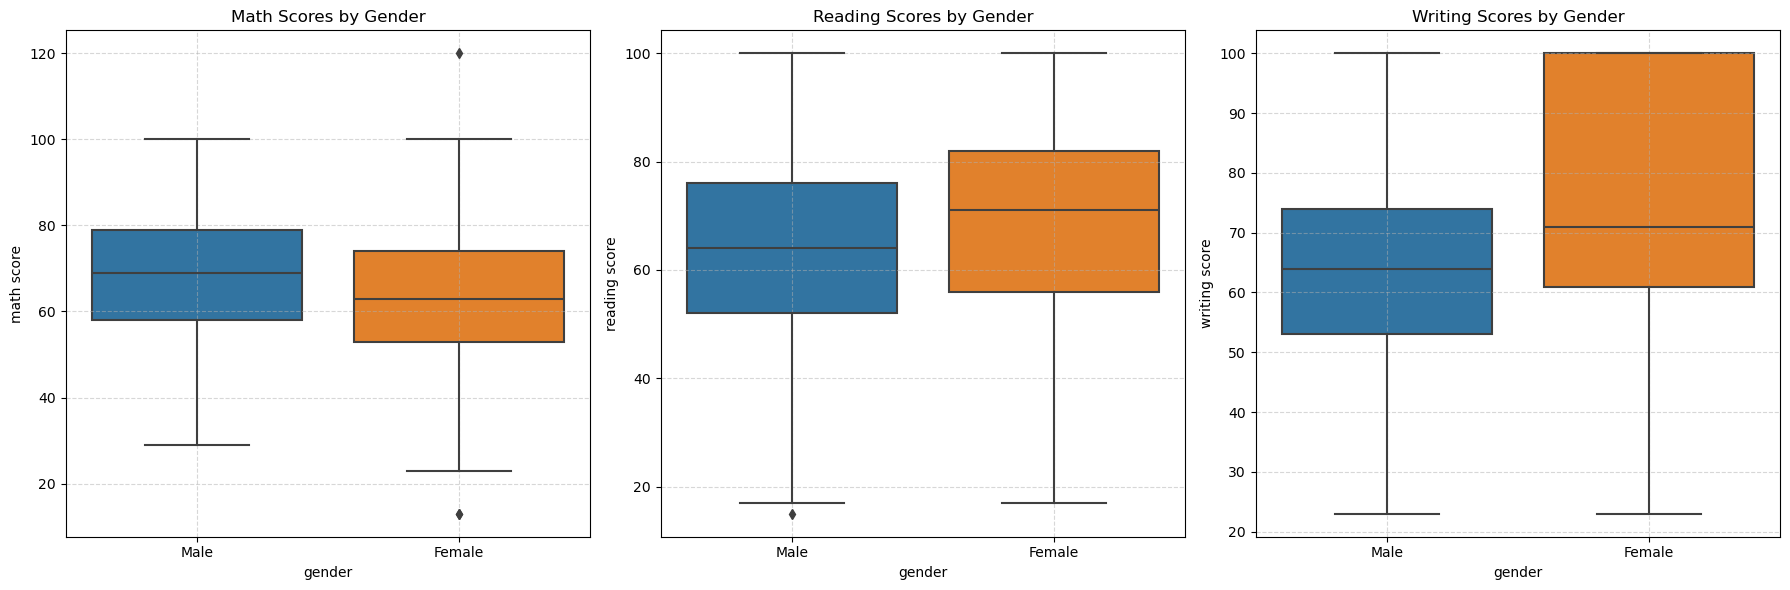

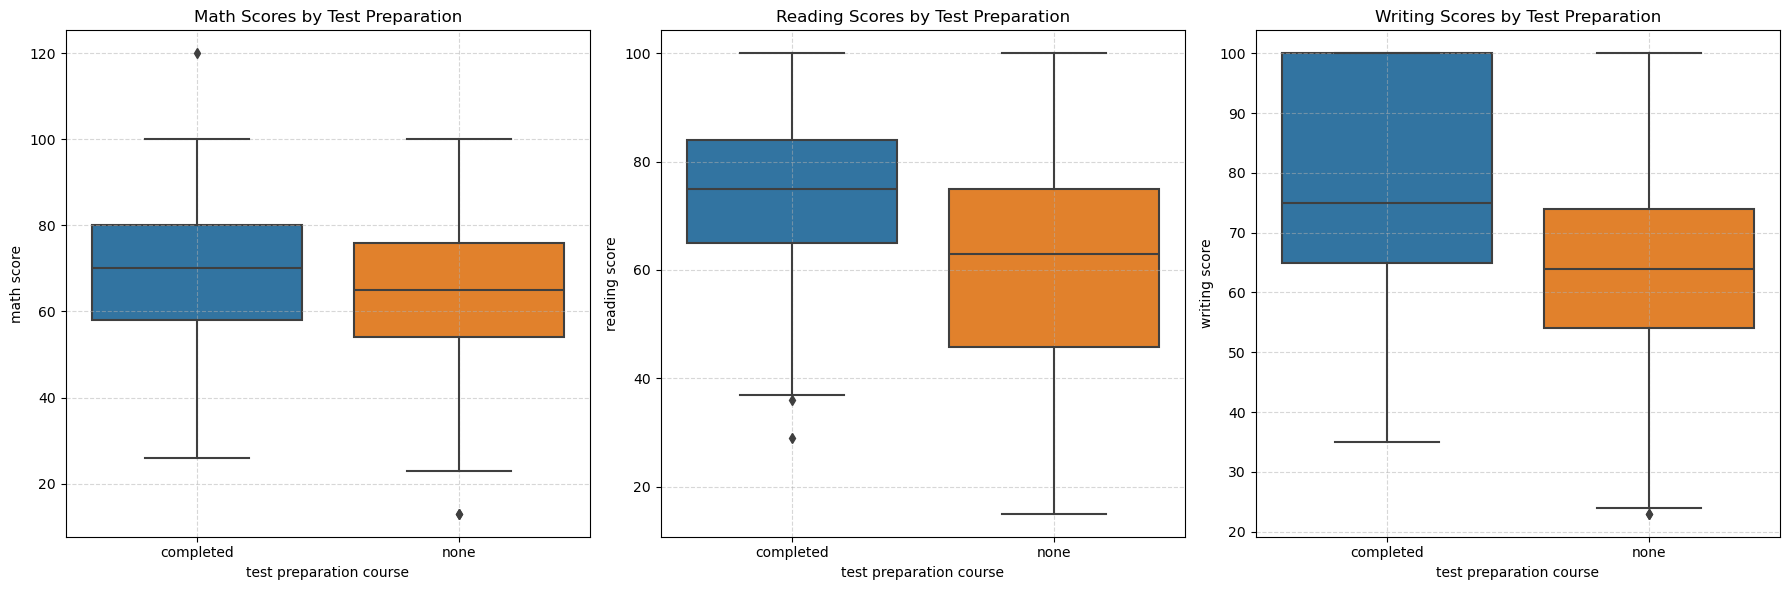

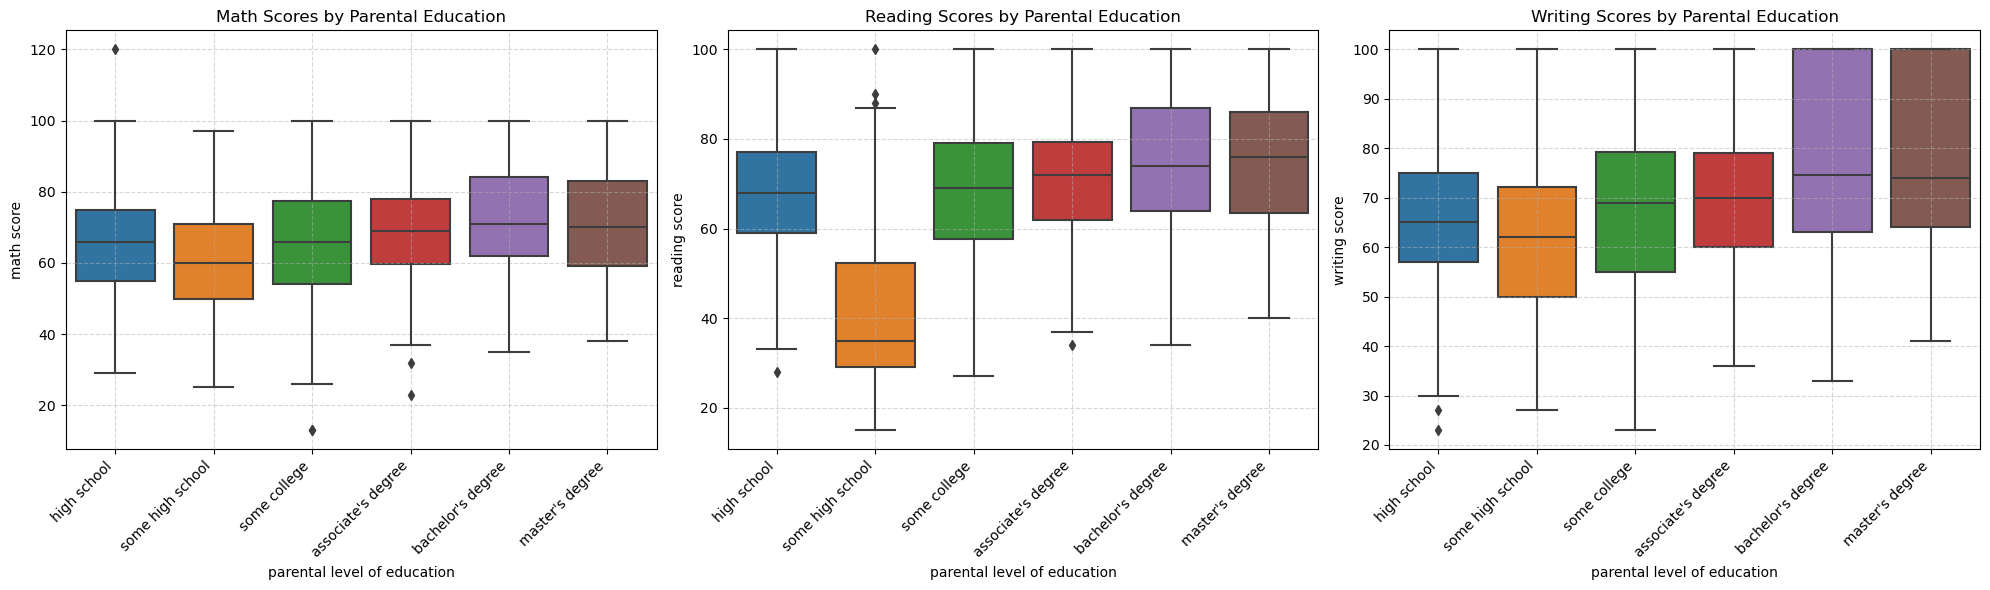

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 1. Grades by Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='math score', data=df)
plt.title('Math Scores by Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 2. Grades by Gender
# Standardize gender to handle capitalization inconsistencies
df['gender'] = df['gender'].str.capitalize()

# Create a figure with 3 subplots (one for each subject)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Math scores
sns.boxplot(x='gender', y='math score', data=df, ax=axes[0])
axes[0].set_title('Math Scores by Gender')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Reading scores
sns.boxplot(x='gender', y='reading score', data=df, ax=axes[1])
axes[1].set_title('Reading Scores by Gender')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Writing scores
sns.boxplot(x='gender', y='writing score', data=df, ax=axes[2])
axes[2].set_title('Writing Scores by Gender')
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 3. Grades by Test Preparation Course
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Math scores
sns.boxplot(x='test preparation course', y='math score', data=df, ax=axes[0])
axes[0].set_title('Math Scores by Test Preparation')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Reading scores
sns.boxplot(x='test preparation course', y='reading score', data=df, ax=axes[1])
axes[1].set_title('Reading Scores by Test Preparation')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Writing scores
sns.boxplot(x='test preparation course', y='writing score', data=df, ax=axes[2])
axes[2].set_title('Writing Scores by Test Preparation')
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 4. Grades by Parental Education
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Math scores
sns.boxplot(x='parental level of education', y='math score', data=df, ax=axes[0])
axes[0].set_title('Math Scores by Parental Education')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Reading scores
sns.boxplot(x='parental level of education', y='reading score', data=df, ax=axes[1])
axes[1].set_title('Reading Scores by Parental Education')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Writing scores
sns.boxplot(x='parental level of education', y='writing score', data=df, ax=axes[2])
axes[2].set_title('Writing Scores by Parental Education')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 5. Average scores by demographic factors (bar charts)
# 5.1 By Gender
plt.figure(figsize=(10, 6))
gender_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_scores.plot(kind='bar')
plt.title('Average Scores by Gender')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

# 5.2 By Test Preparation
plt.figure(figsize=(10, 6))
prep_scores = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
prep_scores.plot(kind='bar')
plt.title('Average Scores by Test Preparation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

# 5.3 By Parental Education
plt.figure(figsize=(12, 6))
edu_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
edu_scores.plot(kind='bar')
plt.title('Average Scores by Parental Education')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5.4 By Age
plt.figure(figsize=(10, 6))
age_scores = df.groupby('Age')[['math score', 'reading score', 'writing score']].mean()
age_scores.plot(kind='bar')
plt.title('Average Scores by Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()


#### What do we care about? The grades are the main problem. Maybe they vary based on any of the other variables

I think we can detect the biggest discrepancies at 3-4 levels: 

- Parental level of education 

- Test preparation course 

- Mybe lunch or gender (I am pretty sure the lunch should not have that much impact but let's still check it)

Let's go deeper

 



It's looks that the students who completed the test preparation course consistently perform better than the ones that didn't complete it. This is one of the clearest patterns in the data, demonstrating that structured preparation has a meaningful positive impact on test performance. The difference is substantial enough to suggest that test preparation resources could be an important intervention for improving academic outcomes.

### 2-variable Analysis with Lunch column 

### 2-variable Analysis with gender column 

### 2-variable Analysis with Test preparation course column 

### What is next?

- Get the story together
- Improve your code
- Get some statistics of the differences you want to show 
- Work on the plots to show the data nicely 
- Get the presentation ready 
- Show what you found to the client